In [1]:
import pandas as pd
import numpy as np
import json 
import os
import matplotlib.pyplot as plt

import platform


c:\Users\MrZang\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\MrZang\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# 读取data.json文件
year = 2024
result_path = f'./results/{year}/'

if not os.path.exists(result_path):
    os.makedirs(result_path)
    print(f'创建文件夹 {result_path}.')

with open(f'data_{year}.json', 'r') as f:
    data = json.load(f)
print(type(data))
# 转化为DataFrame
df_origin = pd.DataFrame(data['resultData']['rows'])
# df_origin

<class 'dict'>


In [416]:
# list_df = list(df_origin.columns)
# list_df

In [4]:
df = df_origin[['meraddr','mername','txamt','txdate','txname','username']]
df['txamt'] = df['txamt'].astype(float)
# 将金额转化为元，并保留两位小数
df['txamt'] = df['txamt']/100
df['txamt'] = df['txamt'].round(2)

df

C:\Users\MrZang\AppData\Local\Temp\ipykernel_22360\2948308563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['txamt'] = df['txamt'].astype(float)
C:\Users\MrZang\AppData\Local\Temp\ipykernel_22360\2948308563.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['txamt'] = df['txamt']/100
C:\Users\MrZang\AppData\Local\Temp\ipykernel_22360\2948308563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,meraddr,mername,txamt,txdate,txname,username
0,澜园,澜园_冷饮组,3.1,2024-12-22 12:13:02,持卡人消费,李子昂
1,澜园,澜园_三层日韩风味,24.0,2024-12-22 12:09:59,持卡人消费,李子昂
2,澜园,澜园_二层基本伙,37.4,2024-12-21 12:26:27,持卡人消费,李子昂
3,紫荆园,紫荆园_套餐系列,1.0,2024-12-20 08:30:04,持卡人消费,李子昂
4,紫荆园,紫荆园_上海小吃,15.0,2024-12-20 08:30:07,持卡人消费,李子昂
...,...,...,...,...,...,...
813,紫荆园,紫荆园_四层大伙,9.5,2024-01-01 18:34:41,持卡人消费,李子昂
814,紫荆园,紫荆园_四层大伙,8.0,2024-01-01 18:34:20,持卡人消费,李子昂
815,桃李园,桃李园_冷饮组,1.5,2024-01-01 13:05:42,持卡人消费,李子昂
816,桃李园,桃李园_麻辣烫组,19.6,2024-01-01 12:56:54,持卡人消费,李子昂


In [418]:
username = df['username'].drop_duplicates()
username = username.iloc[0]
username = str(username)
print(username)


李子昂


In [419]:
# 将处理过的有效信息表格保存为csv文件
# df.to_csv(result_path + f'data_{year}_{username}.csv',index=False,encoding='utf-8-sig')

In [5]:
df['year'] = df['txdate'].apply(lambda x: x[:4])
df['month'] = df['txdate'].apply(lambda x: x[5:7])
df['day'] = df['txdate'].apply(lambda x: x[8:10])
df['hour'] = df['txdate'].apply(lambda x: x[11:13])
df['minute'] = df['txdate'].apply(lambda x: x[14:16])
df['second'] = df['txdate'].apply(lambda x: x[17:19])
df


C:\Users\MrZang\AppData\Local\Temp\ipykernel_22360\2857181853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['txdate'].apply(lambda x: x[:4])
C:\Users\MrZang\AppData\Local\Temp\ipykernel_22360\2857181853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['txdate'].apply(lambda x: x[5:7])
C:\Users\MrZang\AppData\Local\Temp\ipykernel_22360\2857181853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,meraddr,mername,txamt,txdate,txname,username,year,month,day,hour,minute,second
0,澜园,澜园_冷饮组,3.1,2024-12-22 12:13:02,持卡人消费,李子昂,2024,12,22,12,13,02
1,澜园,澜园_三层日韩风味,24.0,2024-12-22 12:09:59,持卡人消费,李子昂,2024,12,22,12,09,59
2,澜园,澜园_二层基本伙,37.4,2024-12-21 12:26:27,持卡人消费,李子昂,2024,12,21,12,26,27
3,紫荆园,紫荆园_套餐系列,1.0,2024-12-20 08:30:04,持卡人消费,李子昂,2024,12,20,08,30,04
4,紫荆园,紫荆园_上海小吃,15.0,2024-12-20 08:30:07,持卡人消费,李子昂,2024,12,20,08,30,07
...,...,...,...,...,...,...,...,...,...,...,...,...
813,紫荆园,紫荆园_四层大伙,9.5,2024-01-01 18:34:41,持卡人消费,李子昂,2024,01,01,18,34,41
814,紫荆园,紫荆园_四层大伙,8.0,2024-01-01 18:34:20,持卡人消费,李子昂,2024,01,01,18,34,20
815,桃李园,桃李园_冷饮组,1.5,2024-01-01 13:05:42,持卡人消费,李子昂,2024,01,01,13,05,42
816,桃李园,桃李园_麻辣烫组,19.6,2024-01-01 12:56:54,持卡人消费,李子昂,2024,01,01,12,56,54


In [6]:
if platform.system() == "Darwin":
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
elif platform.system() == "Linux":
    plt.rcParams['font.family'] = ['Droid Sans Fallback', 'DejaVu Sans']
else:
    plt.rcParams['font.sans-serif'] = ['SimHei']

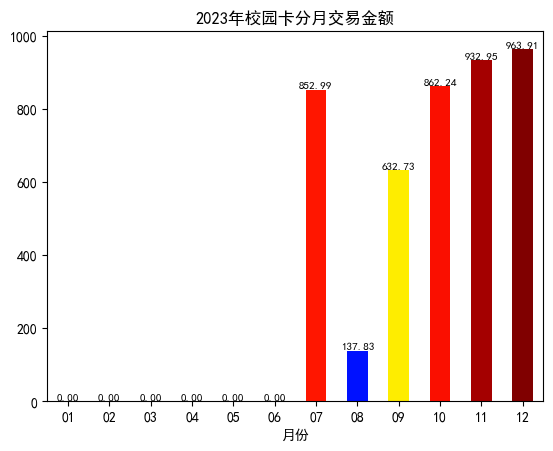

In [422]:
# 绘制分月交易金额柱状图，去除在线充值的数据
df_month = df[df['meraddr']!='在线充值']

# 如果缺少某个月份的数据，会导致绘图时缺少某个月份的柱子，所以需要补全
df_month = df_month.groupby('month')['txamt'].sum()

# 补全缺少的月份
for i in range(1,13):
    # 将个位数的月份转化为两位数
    if i < 10:
        mon = '0' + str(i)
    else:
        mon = str(i)
    
    if mon not in df_month.index:
        df_month.loc[mon] = 0
df_month = df_month.sort_index()

# 设置颜色按金额变化
colors = plt.cm.jet(df_month/df_month.max())

df_month.plot(kind='bar',title=f'{year}年校园卡分月交易金额',rot=0,color=colors)
# 绘制每个月的交易金额
for a,b in zip(range(len(df_month)),df_month):
    plt.text(a,b+0.5,'%.2f'%b,ha='center',va='bottom',fontsize=8)
plt.xlabel('月份')
plt.savefig(result_path + f'{username}_{year}年分月校园卡交易金额.png')
plt.show()

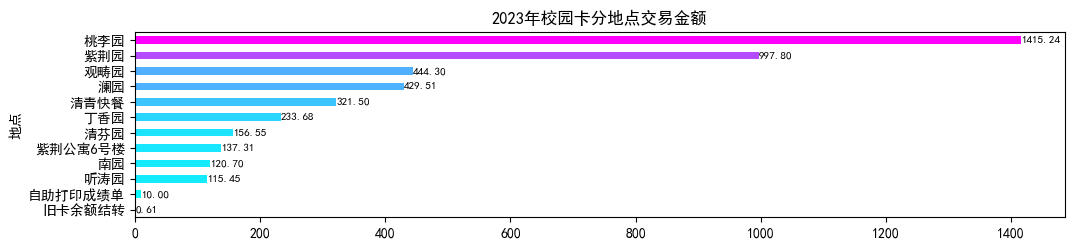

In [423]:
# 绘制分地点交易金额柱状图，并去除在线充值的数据
df_addr = df.groupby('meraddr')['txamt'].sum()
df_addr = df_addr.drop('在线充值')
df_addr = df_addr.sort_values(ascending=True)
plt.figure(figsize=(12,len(df_addr)/5))
# 设置颜色按金额变化
colors = plt.cm.cool(df_addr/df_addr.max())
df_addr.plot(kind='barh',title=f'{year}年校园卡分地点交易金额',fontsize=10,rot=0,color=colors)
# 绘制每个地点的交易金额
for a,b in zip(range(len(df_addr)),df_addr):
    plt.text(b,a,'%.2f'%b,ha='left',va='center',fontsize=8)
plt.ylabel('地点')
plt.savefig(result_path + f'{username}_{year}年分地点校园卡交易金额.png')
plt.show()

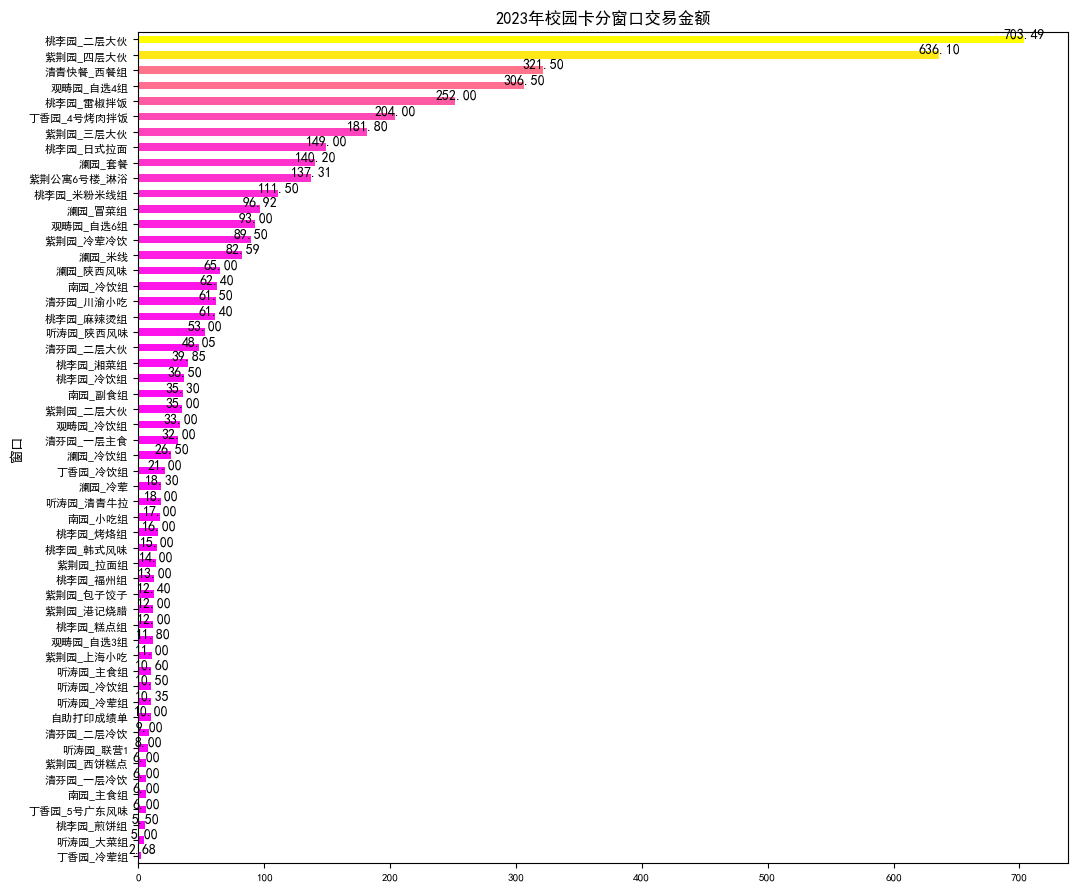

In [424]:
# 绘制分窗口交易金额横向柱状图
df_window = df.groupby('mername')['txamt'].sum()
df_window = df_window.sort_values()

plt.figure(figsize=(12,len(df_window)/5))
# 设置颜色按金额变化
colors = plt.cm.spring(df_window/df_window.max())
df_window.plot(kind='barh',title=f'{year}年校园卡分窗口交易金额',fontsize=8,color=colors)
# 绘制每个窗口的交易金额
for a,b in zip(range(len(df_window)),df_window):
    plt.text(b+0.5,a,'%.2f'%b,ha='center',va='bottom',fontsize=10)
plt.ylabel('窗口')
plt.savefig(result_path + f'{username}_{year}年分窗口校园卡交易金额.png')
plt.show()

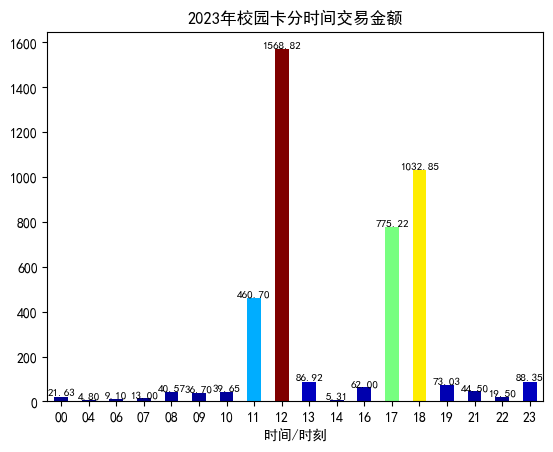

In [425]:
# 绘制分时间交易金额柱状图，去除在线充值的数据
df_hour = df[df['meraddr']!='在线充值'].groupby('hour')['txamt'].sum()
df_hour = df_hour.sort_index()
# 设置颜色按数量变化
colors = plt.cm.jet(df_hour/df_hour.max())
df_hour.plot(kind='bar',title=f'{year}年校园卡分时间交易金额',rot=0,color=colors)
# 绘制每个时间的交易金额
for a,b in zip(range(len(df_hour)),df_hour):
    plt.text(a,b+0.5,'%.2f'%b,ha='center',va='bottom',fontsize=8)
plt.xlabel('时间/时刻')
plt.savefig(result_path + f'{username}_{year}年分时间校园卡交易金额.png')
plt.show()

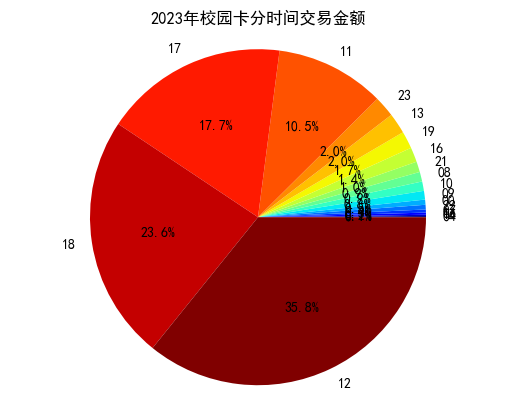

In [426]:
# 绘制分时间交易饼图，去除在线充值的数据
df_hour = df[df['meraddr']!='在线充值'].groupby('hour')['txamt'].sum()
# 按金额排序
df_hour = df_hour.sort_values()
# 设置颜色按金额变化
colors = plt.cm.jet(np.linspace(0,1,len(df_hour)))
df_hour.plot(kind='pie',title=f'{year}年校园卡分时间交易金额',autopct='%1.1f%%',colors=colors)
plt.ylabel('')
plt.axis('equal')
plt.savefig(result_path + f'{username}_{year}年分时间校园卡交易金额饼图.png')
plt.show()

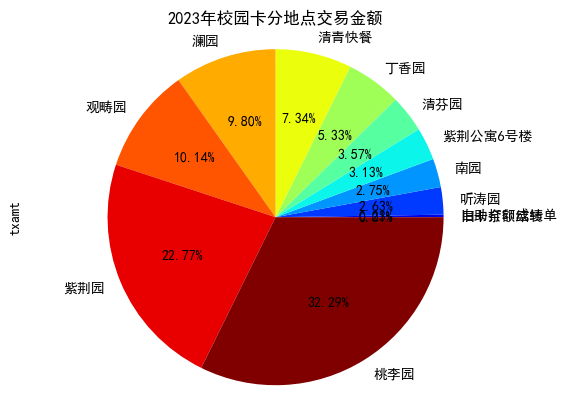

In [427]:
# 绘制分地点交易金额饼图，除去在线充值
df_addr = df.groupby('meraddr')['txamt'].sum()
df_addr = df_addr.drop('在线充值')
df_addr = df_addr.sort_values(ascending=True)
# 设置颜色按金额变化
colors = plt.cm.jet(np.linspace(0,1,len(df_addr)))
df_addr.plot(kind='pie',title=f'{year}年校园卡分地点交易金额',autopct='%.2f%%',colors=colors)
plt.axis('equal')
plt.savefig(result_path + f'{username}_{year}年分地点校园卡交易金额饼图.png')
plt.show()

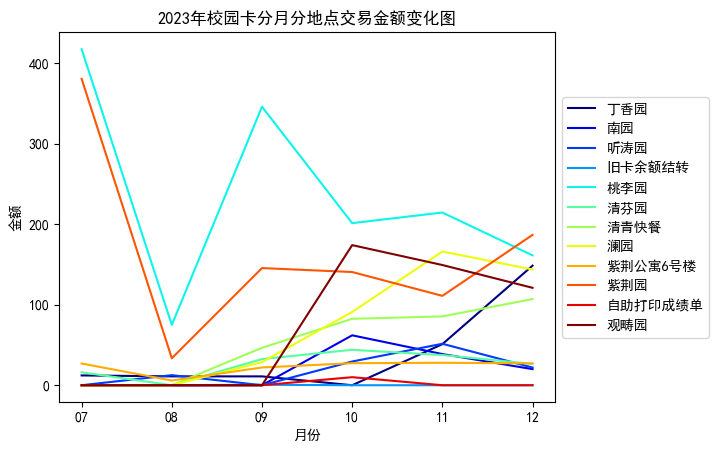

In [428]:
#绘制分月分地点交易金额折线图，除去在线充值
df_month_addr = df[df['meraddr']!='在线充值'].groupby(['month','meraddr'])['txamt'].sum()
df_month_addr = df_month_addr.unstack()

# 填充缺失值
df_month_addr = df_month_addr.fillna(0)

# 设置颜色变化
colors = plt.cm.jet(np.linspace(0,1,len(df_month_addr.columns)))
df_month_addr.plot(title=f'{year}年校园卡分月分地点交易金额变化图',rot=0,color=colors)

plt.xlabel('月份')
plt.ylabel('金额')

plt.legend(title='地点')
#设置图例位置
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))

plt.savefig(result_path + f'{username}_{year}年分月分地点校园卡交易金额.png')
plt.show()

In [7]:
# 整理相关参数，并记录到csv文件中

# 保留原始数据
df_all = df
# 去除在线充值的数据
df = df[df['meraddr']!='在线充值']

# 定义记录df
record = list()

# 记录总交易金额与次数
record.append({'事项':'总交易金额与次数','金额':df['txamt'].sum(),'时间':f'{year}年{df.shape[0]}次','地点':'无'})


# 记录单次交易金额最大值
max_txamt = df['txamt'].max()
df_max_txamt = df[df['txamt']==max_txamt]
df_max_txamt = df_max_txamt.iloc[0]
record.append({'事项':'单次交易金额最大值','金额':df_max_txamt['txamt'],'时间':f'{year}年{df_max_txamt["month"]}月{df_max_txamt["day"]}日{df_max_txamt["hour"]}时{df_max_txamt["minute"]}分{df_max_txamt["second"]}秒','地点':df_max_txamt['mername']})

# 记录单次交易金额最小值
min_txamt = df['txamt'].min()
df_min_txamt = df[df['txamt']==min_txamt]
df_min_txamt = df_min_txamt.iloc[0]
record.append({'事项':'单次交易金额最小值','金额':df_min_txamt['txamt'],'时间':f'{year}年{df_min_txamt["month"]}月{df_min_txamt["day"]}日{df_min_txamt["hour"]}时{df_min_txamt["minute"]}分{df_min_txamt["second"]}秒','地点':df_min_txamt['mername']})

# 记录交易金额均值
record.append({'事项':'交易金额均值','金额':df['txamt'].mean(),'时间':f'{year}年','地点':'无'})

# 记录交易金额分月最大值和最小值，如果有月份没有交易记录，则补充其交易金额为0
df_month = df.groupby('month')['txamt'].sum()
df_month = df_month.sort_index()
df_month = df_month.reindex(index=['01','02','03','04','05','06','07','08','09','10','11','12'],fill_value=0)
max_month = df_month.idxmax()
record.append({'事项':'交易金额分月最大值','金额':df_month.max(),'时间':f'{year}年{max_month}月','地点':'无'})

min_month = df_month.idxmin()
record.append({'事项':'交易金额分月最小值','金额':df_month.min(),'时间':f'{year}年{min_month}月','地点':'无'})

# 记录交易金额分地点最大值和最小值
df_addr = df.groupby('meraddr')['txamt'].sum()
max_addr = df_addr.idxmax()
record.append({'事项':'交易金额分地点最大值','金额':df_addr.max(),'时间':f'{year}年','地点':max_addr})

min_addr = df_addr.idxmin()
record.append({'事项':'交易金额分地点最小值','金额':df_addr.min(),'时间':f'{year}年','地点':min_addr})

# 记录交易金额分时间最大值和最小值
df_hour = df.groupby('hour')['txamt'].sum()
df_hour = df_hour.sort_index()
max_hour = df_hour.idxmax()
record.append({'事项':'交易金额分时间最大值','金额':df_hour.max(),'时间':f'{year}年{max_hour}时','地点':'无'})

min_hour = df_hour.idxmin()
record.append({'事项':'交易金额分时间最小值','金额':df_hour.min(),'时间':f'{year}年{min_hour}时','地点':'无'})

# 记录分月与天交易金额最大值和最小值    
max_month_day = df.groupby(['month','day'])['txamt'].sum().max()
max_month_day_index = df.groupby(['month','day'])['txamt'].sum().idxmax()
record.append({'事项':'分月与天交易金额最大值','金额':max_month_day,'时间':f'{year}年{max_month_day_index[0]}月{max_month_day_index[1]}日','地点':'无'})

min_month_day = df.groupby(['month','day'])['txamt'].sum().min()
min_month_day_index = df.groupby(['month','day'])['txamt'].sum().idxmin()
record.append({'事项':'分月与天交易金额最小值','金额':min_month_day,'时间':f'{year}年{min_month_day_index[0]}月{min_month_day_index[1]}日','地点':'无'})

# 记录最常去的地点及相对应的花费与次数，找到出现次数最多的mername，排除紫荆公寓6号楼、自助打印成绩单
df_addr = df[df['meraddr']!='紫荆公寓6号楼']
df_addr = df_addr[df_addr['meraddr']!='自助打印成绩单']
df_addr_count = df_addr['meraddr'].value_counts()
max_addr = df_addr_count.idxmax()
addr_count = df_addr_count.max()
addr_monney = df_addr[df_addr['meraddr']==max_addr]['txamt'].sum()  
record.append({'事项':'最常去的食堂','金额':addr_monney,'时间':f'{year}年共{addr_count}次','地点':max_addr})

# 记录最常去的窗口及相对应的花费与次数，找到出现次数最多的mername，排除紫荆公寓6号楼、自助打印成绩单
df_name = df[df['meraddr']!='紫荆公寓6号楼']
df_name = df_name[df_name['mername']!='自助打印成绩单']
df_name_count = df_name['mername'].value_counts()
max_name = df_name_count.idxmax()
name_count = df_name_count.max()
name_monney = df_name[df_name['mername']==max_name]['txamt'].sum()
record.append({'事项':'最常去的窗口','金额':name_monney,'时间':f'{year}年共{name_count}次','地点':max_name})

# 记录累计消费最多的食堂及相对应的花费，找到总消费金额最大的meraddr，排除紫荆公寓6号楼、自助打印成绩单
max_addr_cost = df_addr.groupby('meraddr')['txamt'].sum().idxmax()
max_addr_cost_monney = df_addr.groupby('meraddr')['txamt'].sum().max()
record.append({'事项':'累计消费最多的食堂','金额':max_addr_cost_monney,'时间':f'{year}年','地点':max_addr_cost})

# 记录累计消费最多的窗口及相对应的花费，找到总消费金额最大的mername，排除紫荆公寓6号楼、自助打印成绩单
max_name_cost = df_name.groupby('mername')['txamt'].sum().idxmax()
max_name_cost_monney = df_name.groupby('mername')['txamt'].sum().max()
record.append({'事项':'累计消费最多的窗口','金额':max_name_cost_monney,'时间':f'{year}年','地点':max_name_cost})


# 早餐：筛选出hour在4——9点的数据，排除meraddr为紫荆公寓6号楼、自助打印成绩单的数据
df_breakfast = df[(df['hour']=='04')|(df['hour']=='05')|(df['hour']=='06')|(df['hour']=='07')|(df['hour']=='08')|(df['hour']=='09')]
df_breakfast = df_breakfast[(df_breakfast['meraddr']!='紫荆公寓6号楼')&(df_breakfast['mername']!='自助打印成绩单')]

# 记录吃早餐最早时间，找到最接近6的一条数据，按照minute、second依次检索得最小的一条数据
df_breakfast_early = df_breakfast.sort_values(by=['hour','minute','second'])
df_breakfast_earliest = df_breakfast_early.iloc[0]
record.append({'事项':'吃早餐最早时间','金额':df_breakfast_earliest['txamt'],'时间':f'{year}年{df_breakfast_earliest["month"]}月{df_breakfast_earliest["day"]}日{df_breakfast_earliest["hour"]}时{df_breakfast_earliest["minute"]}分{df_breakfast_earliest["second"]}秒','地点':df_breakfast_earliest['mername']})

# 记录吃早餐最晚时间，找到按照minute、second依次检索得最大的一条数据
df_breakfast_late = df_breakfast.sort_values(by=['hour','minute','second'],ascending=False)
df_breakfast_latest = df_breakfast_late.iloc[0]
record.append({'事项':'吃早餐最晚时间','金额':df_breakfast_latest['txamt'],'时间':f'{year}年{df_breakfast_latest["month"]}月{df_breakfast_latest["day"]}日{df_breakfast_latest["hour"]}时{df_breakfast_latest["minute"]}分{df_breakfast_latest["second"]}秒','地点':df_breakfast_latest['mername']})

# 记录吃早餐的总次数，并且同一天的数据只算一次
breakfast_monney = df_breakfast['txamt'].sum()
df_breakfast_count_a_day = df_breakfast.groupby(['month','day']).count()
df_breakfast_count = df_breakfast_count_a_day.shape[0]
record.append({'事项':'吃早餐总次数','金额':breakfast_monney,'时间':f'{year}年共{df_breakfast_count}次','地点':'无'})

# 记录吃早餐最常去的地点及相对应的花费与次数，找到出现次数最多的meraddr，并且同一天的数据只算一次
df_breakfast_by_day = df_breakfast.drop_duplicates(subset=['month','day'])
df_breakfast_addr = df_breakfast_by_day['meraddr'].value_counts()
max_breakfast_addr = df_breakfast_addr.idxmax()
breakfast_addr_count = df_breakfast_addr.max()
breakfast_addr_monney = df_breakfast_by_day[df_breakfast_by_day['meraddr']==max_breakfast_addr]['txamt'].sum()
record.append({'事项':'吃早餐最常去的食堂','金额':breakfast_addr_monney,'时间':f'{year}年共{breakfast_addr_count}次','地点':max_breakfast_addr})

# 记录吃早餐最常去的窗口及相对应的花费与次数，找到出现次数最多的mername
df_breakfast_name = df_breakfast['mername'].value_counts()
max_breakfast_name = df_breakfast_name.idxmax()
breakfast_name_count = df_breakfast_name.max()
breakfast_name_monney = df_breakfast[df_breakfast['mername']==max_breakfast_name]['txamt'].sum()
record.append({'事项':'吃早餐最常去的窗口','金额':breakfast_name_monney,'时间':f'{year}年共{breakfast_name_count}次','地点':max_breakfast_name})


# 午饭：筛选出hour在11——13点的数据，排除meraddr为紫荆公寓6号楼、自助打印成绩单的数据
df_lunch = df[(df['hour']=='11')|(df['hour']=='12')|(df['hour']=='13')]
df_lunch = df_lunch[(df_lunch['meraddr']!='紫荆公寓6号楼')&(df_lunch['mername']!='自助打印成绩单')]

# 记录吃午饭最早的时间，，找到最接近11的一条数据，按照minute、second依次检索得最小的一条数据
df_lunch_early = df_lunch.sort_values(by=['hour','minute','second'])
df_lunch_earliest = df_lunch_early.iloc[0]
record.append({'事项':'吃午饭最早时间','金额':df_lunch_earliest['txamt'],'时间':f'{year}年{df_lunch_earliest["month"]}月{df_lunch_earliest["day"]}日{df_lunch_earliest["hour"]}时{df_lunch_earliest["minute"]}分{df_lunch_earliest["second"]}秒','地点':df_lunch_earliest['mername']})

# 记录吃午饭最晚时间，找到按照minute、second依次检索得最大的一条数据
df_lunch_late = df_lunch.sort_values(by=['hour','minute','second'],ascending=False)
df_lunch_latest = df_lunch_late.iloc[0]
record.append({'事项':'吃午饭最晚时间','金额':df_lunch_latest['txamt'],'时间':f'{year}年{df_lunch_latest["month"]}月{df_lunch_latest["day"]}日{df_lunch_latest["hour"]}时{df_lunch_latest["minute"]}分{df_lunch_latest["second"]}秒','地点':df_lunch_latest['mername']})

# 记录吃午饭的总次数，筛选出hour在11——12点的数据，并且同一天的数据只算一次，排除meraddr为紫荆公寓6号楼、自助打印成绩单的数据
lunch_monney = df_lunch['txamt'].sum()
df_lunch_count_a_day = df_lunch.groupby(['month','day']).count()
df_lunch_count = df_lunch_count_a_day.shape[0]
record.append({'事项':'吃午饭总次数','金额':lunch_monney,'时间':f'{year}年共{df_lunch_count}次','地点':'无'})

# 记录吃午饭最常去的地点及相对应的花费与次数，找到出现次数最多的meraddr，并且同一天的数据只算一次
df_lunch_by_day = df_lunch.drop_duplicates(subset=['month','day'])
df_lunch_addr = df_lunch_by_day['meraddr'].value_counts()
max_lunch_addr = df_lunch_addr.idxmax()
lunch_addr_count = df_lunch_addr.max()
lunch_addr_monney = df_lunch_by_day[df_lunch_by_day['meraddr']==max_lunch_addr]['txamt'].sum()
record.append({'事项':'吃午饭最常去的食堂','金额':lunch_addr_monney,'时间':f'{year}年共{lunch_addr_count}次','地点':max_lunch_addr})

# 记录吃午饭最常去的窗口及相对应的花费与次数，找到出现次数最多的mername
df_lunch_name = df_lunch['mername'].value_counts()
max_lunch_name = df_lunch_name.idxmax()
lunch_name_count = df_lunch_name.max()
lunch_name_monney = df_lunch[df_lunch['mername']==max_lunch_name]['txamt'].sum()
record.append({'事项':'吃午饭最常去的窗口','金额':lunch_name_monney,'时间':f'{year}年共{lunch_name_count}次','地点':max_lunch_name})


# 晚饭：筛选出hour在16——19点的数据，排除meraddr为紫荆公寓6号楼、自助打印成绩单的数据
df_dinner = df[(df['hour']=='16')|(df['hour']=='17')|(df['hour']=='18')|(df['hour']=='19')]
df_dinner = df_dinner[(df_dinner['meraddr']!='紫荆公寓6号楼')&(df_dinner['mername']!='自助打印成绩单')]

# 记录吃晚饭最早时间，找到最接近17的一条数据，按照minute、second依次检索得最小的一条数据
df_dinner_early = df_dinner.sort_values(by=['hour','minute','second'])
df_dinner_earliest = df_dinner_early.iloc[0]
record.append({'事项':'吃晚饭最早时间','金额':df_dinner_earliest['txamt'],'时间':f'{year}年{df_dinner_earliest["month"]}月{df_dinner_earliest["day"]}日{df_dinner_earliest["hour"]}时{df_dinner_earliest["minute"]}分{df_dinner_earliest["second"]}秒','地点':df_dinner_earliest['mername']})

# 记录吃晚饭最晚时间，，找到按照minute、second依次检索得最大的一条数据
df_dinner_late = df_dinner.sort_values(by=['hour','minute','second'],ascending=False)
df_dinner_latest = df_dinner_late.iloc[0]
record.append({'事项':'吃晚饭最晚时间','金额':df_dinner_latest['txamt'],'时间':f'{year}年{df_dinner_latest["month"]}月{df_dinner_latest["day"]}日{df_dinner_latest["hour"]}时{df_dinner_latest["minute"]}分{df_dinner_latest["second"]}秒','地点':df_dinner_latest['mername']})

# 记录吃晚饭的总次数，筛选出hour在16——18点的数据，并且同一天的数据只算一次，排除meraddr为紫荆公寓6号楼、自助打印成绩单的数据
dinner_monney = df_dinner['txamt'].sum()
df_dinner_count_a_day = df_dinner.groupby(['month','day']).count()
df_dinner_count = df_dinner_count_a_day.shape[0]
record.append({'事项':'吃晚饭总次数','金额':dinner_monney,'时间':f'{year}年共{df_dinner_count}次','地点':'无'})

# 记录吃晚饭最常去的地点及相对应的花费与次数，找到出现次数最多的meraddr，并且同一天的数据只算一次
df_dinner_by_day = df_dinner.drop_duplicates(subset=['month','day'])
df_dinner_addr = df_dinner_by_day['meraddr'].value_counts()
max_dinner_addr = df_dinner_addr.idxmax()
dinner_addr_count = df_dinner_addr.max()
dinner_addr_monney = df_dinner_by_day[df_dinner_by_day['meraddr']==max_dinner_addr]['txamt'].sum()
record.append({'事项':'吃晚饭最常去的食堂','金额':dinner_addr_monney,'时间':f'{year}年共{dinner_addr_count}次','地点':max_dinner_addr})

# 记录吃晚饭最常去的窗口及相对应的花费与次数，找到出现次数最多的mername
df_dinner_name = df_dinner['mername'].value_counts()
max_dinner_name = df_dinner_name.idxmax()
dinner_name_count = df_dinner_name.max()
dinner_name_monney = df_dinner[df_dinner['mername']==max_dinner_name]['txamt'].sum()
record.append({'事项':'吃晚饭最常去的窗口','金额':dinner_name_monney,'时间':f'{year}年共{dinner_name_count}次','地点':max_dinner_name})


# 吃宵夜：筛选出hour在20——23点的数据，排除meraddr为紫荆公寓6号楼、自助打印成绩单的数据
df_midnight = df[(df['hour']=='20')|(df['hour']=='21')|(df['hour']=='22')|(df['hour']=='23')]
df_midnight = df_midnight[(df_midnight['meraddr']!='紫荆公寓6号楼')&(df_midnight['mername']!='自助打印成绩单')]

# 记录吃宵夜最早时间，找到最接近20的一条数据
df_midnight_early = df_midnight.sort_values(by=['hour','minute','second'])
df_midnight_earliest = df_midnight_early.iloc[0]
record.append({'事项':'吃宵夜最早时间','金额':df_midnight_earliest['txamt'],'时间':f'{year}年{df_midnight_earliest["month"]}月{df_midnight_earliest["day"]}日{df_midnight_earliest["hour"]}时{df_midnight_earliest["minute"]}分{df_midnight_earliest["second"]}秒','地点':df_midnight_earliest['mername']})

# 记录吃宵夜最晚时间，找到按照minute、second依次检索得最大的一条数据
df_midnight_late = df_midnight.sort_values(by=['hour','minute','second'],ascending=False)
df_midnight_latest = df_midnight_late.iloc[0]
record.append({'事项':'吃宵夜最晚时间','金额':df_midnight_latest['txamt'],'时间':f'{year}年{df_midnight_latest["month"]}月{df_midnight_latest["day"]}日{df_midnight_latest["hour"]}时{df_midnight_latest["minute"]}分{df_midnight_latest["second"]}秒','地点':df_midnight_latest['mername']})

# 记录吃宵夜的总次数，并且同一天的数据只算一次
midnight_monney = df_midnight['txamt'].sum()
df_midnight_count_a_day = df_midnight.groupby(['month','day']).count()
df_midnight_count = df_midnight_count_a_day.shape[0]
record.append({'事项':'吃宵夜总次数','金额':midnight_monney,'时间':f'{year}年共{df_midnight_count}次','地点':'无'})

# 记录吃宵夜最常去的地点及相对应的花费与次数，找到出现次数最多的meraddr，并且同一天的数据只算一次
df_midnight_by_day = df_midnight.drop_duplicates(subset=['month','day'])
df_midnight_addr = df_midnight_by_day['meraddr'].value_counts()
max_midnight_addr = df_midnight_addr.idxmax()
midnight_addr_count = df_midnight_addr.max()
midnight_addr_monney = df_midnight_by_day[df_midnight_by_day['meraddr']==max_midnight_addr]['txamt'].sum()
record.append({'事项':'吃宵夜最常去的食堂','金额':midnight_addr_monney,'时间':f'{year}年共{midnight_addr_count}次','地点':max_midnight_addr})

# 记录吃宵夜最常去的窗口及相对应的花费与次数，找到出现次数最多的mername
df_midnight_name = df_midnight['mername'].value_counts()
max_midnight_name = df_midnight_name.idxmax()
midnight_name_count = df_midnight_name.max()
midnight_name_monney = df_midnight[df_midnight['mername']==max_midnight_name]['txamt'].sum()
record.append({'事项':'吃宵夜最常去的窗口','金额':midnight_name_monney,'时间':f'{year}年共{midnight_name_count}次','地点':max_midnight_name})


# 洗澡：筛选出meraddr为紫荆公寓6号楼的数据
df_bath = df[df['meraddr']=='紫荆公寓6号楼']

# 记录洗澡最晚时间，找到hour为0，按照minute、second依次检索得最大的一条数据
df_bath_late = df_bath[df_bath['hour']=='00']
df_bath_late = df_bath_late.sort_values(by=['minute','second'],ascending=False)
df_bath_latest = df_bath_late.iloc[0]
record.append({'事项':'洗澡最晚时间','金额':df_bath_latest['txamt'],'时间':f'{year}年{df_bath_latest["month"]}月{df_bath_latest["day"]}日{df_bath_latest["hour"]}时{df_bath_latest["minute"]}分{df_bath_latest["second"]}秒','地点':df_bath_latest['mername']})

# 记录最常洗澡的时间，找到出现次数最多的hour
df_bath_hour = df_bath['hour'].value_counts()
max_bath = df_bath_hour.idxmax()

if max_bath != 23:
    max_bath_end = int(max_bath) + 1
else:
    max_bath_end = 0

record.append({'事项':'最常洗澡时间','金额':df_bath_hour.max(),'时间':f'{year}年{max_bath}点到{max_bath_end}点','地点':df_bath_latest['mername']})

# 记录洗澡的总次数
bath_monney = df_bath['txamt'].sum()
record.append({'事项':'洗澡总次数','金额':bath_monney,'时间':f'{year}年{df_bath.shape[0]}次','地点':df_bath_latest['mername']})


# 整理记录为DataFrame
df_record = pd.DataFrame(record)

# 金额设置为两位小数
df_record['金额'] = df_record['金额'].round(2)

df_record

,事项,金额,时间,地点
0,总交易金额与次数,6712.81,2024年800次,无
1,单次交易金额最大值,40.00,2024年11月30日17时10分51秒,澜园_套餐
2,单次交易金额最小值,0.03,2024年06月08日23时36分52秒,紫荆公寓6号楼_淋浴
3,交易金额均值,8.39,2024年,无
4,交易金额分月最大值,790.37,2024年06月,无
5,交易金额分月最小值,0.00,2024年07月,无
6,交易金额分地点最大值,2571.53,2024年,桃李园
7,交易金额分地点最小值,13.50,2024年,家园
8,交易金额分时间最大值,2706.73,2024年12时,无
9,交易金额分时间最小值,7.63,2024年10时,无


In [430]:
df_record.to_csv(result_path + f'{username}_{year}年校园卡交易总结记录.csv',index=False,encoding='utf-8-sig')


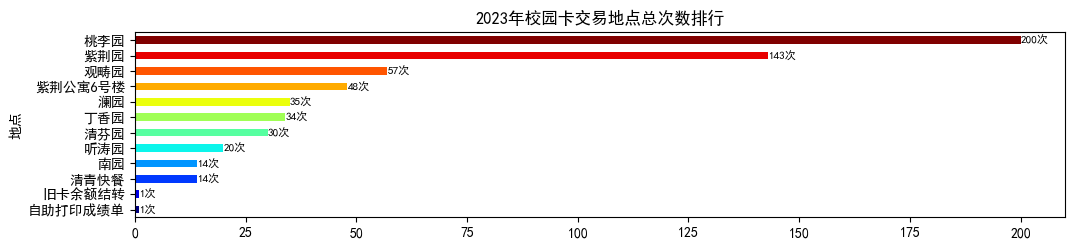

In [431]:
# 绘制交易地点次数柱状图
df_addr_count = df['meraddr'].value_counts()
df_addr_count = df_addr_count.sort_values(ascending=True)
plt.figure(figsize=(12,len(df_addr_count)/5))
# 设置颜色变化
colors = plt.cm.jet(np.linspace(0,1,len(df_addr_count)))
df_addr_count.plot(kind='barh',title=f'{year}年校园卡交易地点总次数排行',rot=0,color=colors)
# 绘制每个地点的交易次数
for a,b in zip(range(len(df_addr_count)),df_addr_count):
    plt.text(b,a,f'{b}次',ha='left',va='center',fontsize=8)
# 设置y轴标签
plt.ylabel('地点')
plt.savefig(result_path + f'{username}_{year}年校园卡交易地点总次数排行.png')
plt.show()


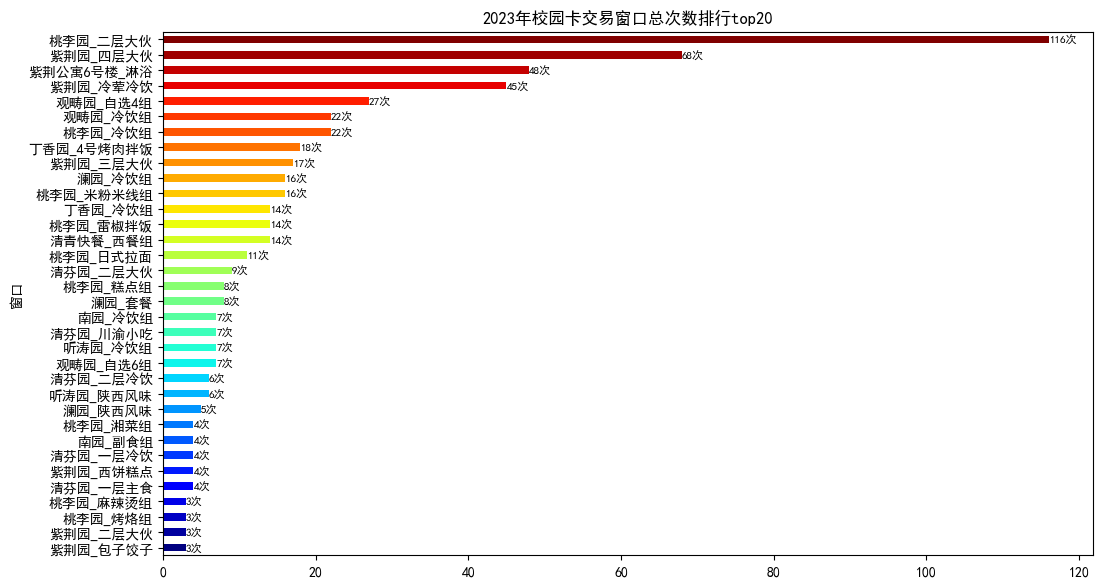

In [432]:
# 绘制交易窗口次数柱状图，取前20个窗口
df_name_count = df['mername'].value_counts()
df_name_count = df_name_count.sort_values(ascending=True)
df_name_count = df_name_count[20:]
plt.figure(figsize=(12,len(df_name_count)/5))
# 设置颜色变化
colors = plt.cm.jet(np.linspace(0,1,len(df_name_count)))
df_name_count.plot(kind='barh',title=f'{year}年校园卡交易窗口总次数排行top20',rot=0,color=colors)
# 绘制每个窗口的交易次数
for a,b in zip(range(len(df_name_count)),df_name_count):
    plt.text(b,a,f'{b}次',ha='left',va='center',fontsize=8)
# 设置y轴标签
plt.ylabel('窗口')
plt.savefig(result_path + f'{username}_{year}年校园卡交易窗口总次数排行top20.png')
plt.show()


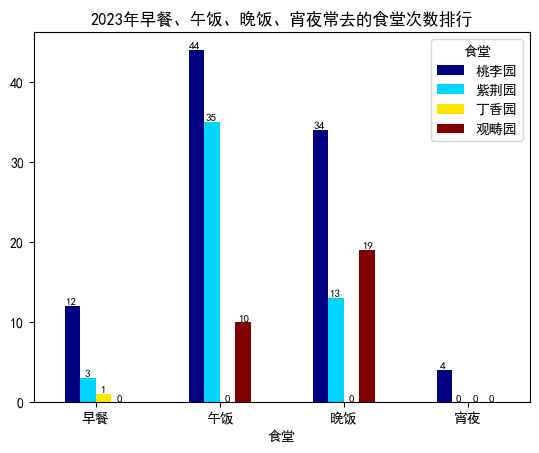

In [433]:
# 绘制早餐、午饭、晚饭、宵夜常去的食堂的次数柱状图，绘制到一张图上，横坐标为早餐、午饭、晚饭、宵夜，食堂数分别取前三
df_breakfast_count_a_day = df_breakfast.drop_duplicates(subset=['month','day'])
df_breakfast_addr = df_breakfast_count_a_day['meraddr'].value_counts()
df_breakfast_addr = df_breakfast_addr[:3]

df_lunch_by_day = df_lunch.drop_duplicates(subset=['month','day'])
df_lunch_addr = df_lunch_by_day['meraddr'].value_counts()
df_lunch_addr = df_lunch_addr[:3]

df_dinner_by_day = df_dinner.drop_duplicates(subset=['month','day'])
df_dinner_addr = df_dinner_by_day['meraddr'].value_counts()
df_dinner_addr = df_dinner_addr[:3]

df_midnight_by_day = df_midnight.drop_duplicates(subset=['month','day'])
df_midnight_addr = df_midnight_by_day['meraddr'].value_counts()
df_midnight_addr = df_midnight_addr[:3]

df_addr_count = pd.concat([df_breakfast_addr,df_lunch_addr,df_dinner_addr,df_midnight_addr],axis=1)
df_addr_count.columns = ['早餐','午饭','晚饭','宵夜']
df_addr_count = df_addr_count.fillna(0)
df_addr_count = df_addr_count.T
df_addr_count = df_addr_count.fillna(0)
# 设置颜色变化
colors = plt.cm.jet(np.linspace(0,1,len(df_addr_count.columns)))
df_addr_count.plot(kind='bar',title=f'{year}年早餐、午饭、晚饭、宵夜常去的食堂次数排行',rot=0,color=colors)
# 绘制每个食堂的交易次数
for a in range(len(df_addr_count)):
    for b in range(len(df_addr_count.columns)):
        # 标注数值，避免互相重叠
        # plt.text(a,b+5,int(df_addr_count.iloc[b,a]),ha='center',va='top',fontsize=8)
        plt.text(b-(0.2-a*0.13),int(df_addr_count.iloc[b,a]),int(df_addr_count.iloc[b,a]),ha='center',va='bottom',fontsize=8)
# 设置标签
plt.legend(title='食堂')
# 设置x轴标签
plt.xlabel('食堂')
plt.savefig(result_path + f'{username}_{year}年校园卡早餐、午饭、晚饭、宵夜常去的食堂次数排行.png')
plt.show()



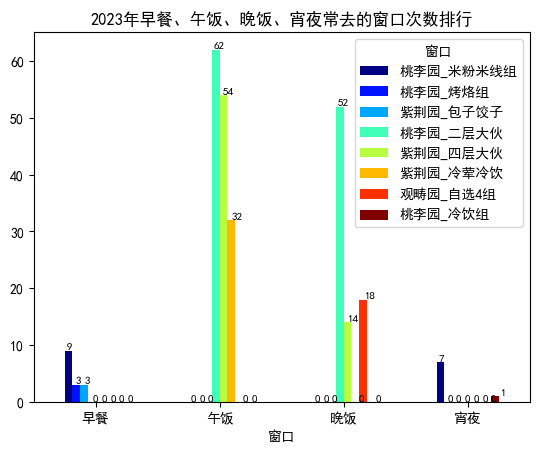

In [434]:
# 绘制早餐、午饭、晚饭、宵夜常去的窗口的次数柱状图，绘制到一张图上，横坐标为早餐、午饭、晚饭、宵夜，窗口数分别取前三
df_breakfast_name = df_breakfast['mername'].value_counts()
df_breakfast_name = df_breakfast_name[:3]

df_lunch_name = df_lunch['mername'].value_counts()
df_lunch_name = df_lunch_name[:3]

df_dinner_name = df_dinner['mername'].value_counts()
df_dinner_name = df_dinner_name[:3]

df_midnight_name = df_midnight['mername'].value_counts()
df_midnight_name = df_midnight_name[:3]

df_name_count = pd.concat([df_breakfast_name,df_lunch_name,df_dinner_name,df_midnight_name],axis=1)
df_name_count.columns = ['早餐','午饭','晚饭','宵夜']
df_name_count = df_name_count.fillna(0)
df_name_count = df_name_count.T
df_name_count = df_name_count.fillna(0)

# 设置颜色变化
colors = plt.cm.jet(np.linspace(0,1,len(df_name_count.columns)))
df_name_count.plot(kind='bar',title=f'{year}年早餐、午饭、晚饭、宵夜常去的窗口次数排行',rot=0,color=colors)
# 绘制每个窗口的交易次数
for a in range(len(df_name_count)):
    for b in range(len(df_name_count.columns)):
        # 标注数值，避免互相重叠
        # plt.text(a,b+5,int(df_name_count.iloc[b,a]),ha='center',va='top',fontsize=8)
        plt.text(a - (0.21 - b*0.07),int(df_name_count.iloc[a,b]),int(df_name_count.iloc[a,b]),ha='center',va='bottom',fontsize=8)
# 设置标签
plt.legend(title='窗口')
# 设置x轴标签
plt.xlabel('窗口')
plt.savefig(result_path + f'{username}_{year}年校园卡早餐、午饭、晚饭、宵夜常去的窗口次数排行.png')
plt.show()


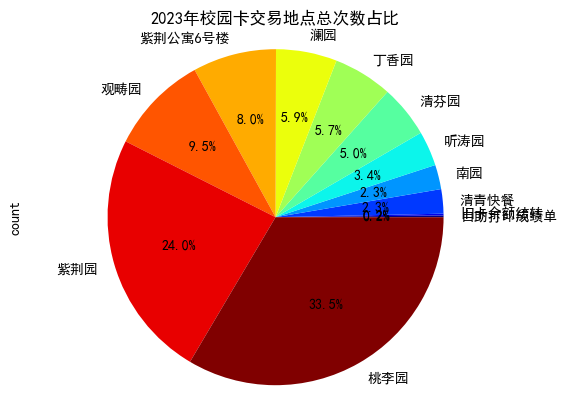

In [435]:
# 绘制分地点交易次数饼图，除去在线充值
df_addr_count = df['meraddr'].value_counts()
df_addr_count = df_addr_count.sort_values(ascending=True)
#df_addr_count = df_addr_count.drop('在线充值')
# 设置颜色变化
colors = plt.cm.jet(np.linspace(0,1,len(df_addr_count)))
df_addr_count.plot(kind='pie',title=f'{year}年校园卡交易地点总次数占比',autopct='%1.1f%%',colors=colors)
plt.axis('equal')
plt.savefig(result_path + f'{username}_{year}年校园卡交易地点总次数占比.png')
plt.show()
